<a href="https://colab.research.google.com/github/FranziskoB/Analise_correspondencia_simples_multipla/blob/main/R_Analise_Correspondencia_simples_multi_Exemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Correspondência Simples

Dataset sobre avaliação de uma gestão pública

##Importando bibliotecas

In [ ]:
if(!"htmltools" %in% installed.packages()){
    install.packages("htmltools", version='0.5.4')}
library(htmltools)

In [ ]:
if(!"FactoMineR" %in% installed.packages()){
    install.packages("FactoMineR")} 
    library(FactoMineR)

In [ ]:

if(!"sjPlot" %in% installed.packages()){
    install.packages("sjPlot")}
if(!"amap" %in% installed.packages()){
    install.packages("amap")}
if(!"ade4" %in% installed.packages()){
    install.packages("ade4")} 
if(!"openxlsx" %in% installed.packages()){
    install.packages("openxlsx")} 
if(!"ggrepel" %in% installed.packages()){
    install.packages("ggrepel")} 
if(!"IRdisplay" %in% installed.packages()){
    install.packages("IRdisplay")}
library(magrittr)
library(knitr)
library(amap)
library(ade4)
library(sjPlot)
library(openxlsx)
library(tibble)
library(ggrepel)
library(dplyr)
library(tidyverse)
library(IRdisplay)

##Carregamento da base de dados 

In [ ]:
load(url("https://github.com/FranziskoB/Analise_correspondencia_simples_multipla/raw/main/dados/gestao_municipal.RData"))

Visualização da base de dados

In [ ]:
head(gestao_municipal,10)

avaliação,ano
<fct>,<fct>
Concordo Totalmente,20X1
Concordo Totalmente,20X1
Concordo Totalmente,20X1
Concordo Parcialmente,20X1
Concordo Totalmente,20X1
Concordo Parcialmente,20X1
Concordo Parcialmente,20X1
Concordo Totalmente,20X1
"Nem Concordo, Nem Discordo",20X1


##Tabelas de frequência das variáveis

In [ ]:
summary(gestao_municipal)

                      avaliação      ano      
 Discordo Totalmente       : 998   20X1:3000  
 Discordo Parcialmente     :2004   20X2:3000  
 Nem Concordo, Nem Discordo:2970   20X3:3000  
 Concordo Parcialmente     :2062              
 Concordo Totalmente       : 966              

## 1ª Parte: Análise da associação por meio de tabelas

Tabela de contingência com frequências absolutas observadas

In [ ]:
tabela_contingencia <- table(gestao_municipal$avaliação,
                             gestao_municipal$ano)
tabela_contingencia


                            
                             20X1 20X2 20X3
  Discordo Totalmente           0    1  997
  Discordo Parcialmente         1  998 1005
  Nem Concordo, Nem Discordo  967 1005  998
  Concordo Parcialmente      1066  996    0
  Concordo Totalmente         966    0    0

Definição da quantidade de observações na tabela de contingência

In [ ]:
n <- sum(tabela_contingencia)
n

[1] 9000

Estatística qui-quadrado e teste

In [ ]:
qui2 <- chisq.test(x = tabela_contingencia)
qui2


	Pearson's Chi-squared test

data:  tabela_contingencia
X-squared = 5956.4, df = 8, p-value < 2.2e-16


Tabela de contingência com frequências absolutas observadas

In [ ]:
qui2$observed

                            
                             20X1 20X2 20X3
  Discordo Totalmente           0    1  997
  Discordo Parcialmente         1  998 1005
  Nem Concordo, Nem Discordo  967 1005  998
  Concordo Parcialmente      1066  996    0
  Concordo Totalmente         966    0    0

Tabela de contingência com frequências absolutas esperadas

In [ ]:
qui2$expected

,20X1,20X2,20X3
Discordo Totalmente,332.6667,332.6667,332.6667
Discordo Parcialmente,668.0000,668.0000,668.0000
"Nem Concordo, Nem Discordo",990.0000,990.0000,990.0000
Concordo Parcialmente,687.3333,687.3333,687.3333
Concordo Totalmente,322.0000,322.0000,322.0000


Resíduos – diferenças entre frequências absolutas observadas e esperadas

In [ ]:
qui2$observed - qui2$expected

             
              Poupanca   CDB Acoes
  Conservador     5.45 -2.80 -2.65
  Moderado        1.25  6.00 -7.25
  Agressivo      -6.70 -3.20  9.90

Valores de qui-quadrado por célula

In [ ]:
((qui2$observed - qui2$expected)^2)/qui2$expected

                            
                                     20X1         20X2         20X3
  Discordo Totalmente        3.326667e+02 3.306697e+02 1.326670e+03
  Discordo Parcialmente      6.660015e+02 1.630240e+02 1.700135e+02
  Nem Concordo, Nem Discordo 5.343434e-01 2.272727e-01 6.464646e-02
  Concordo Parcialmente      2.086156e+02 1.386156e+02 6.873333e+02
  Concordo Totalmente        1.288000e+03 3.220000e+02 3.220000e+02

Resíduos padronizados

In [ ]:
qui2$residuals

                            
                                    20X1        20X2        20X3
  Discordo Totalmente        -18.2391520 -18.1843249  36.4234769
  Discordo Parcialmente      -25.8070048  12.7680833  13.0389215
  Nem Concordo, Nem Discordo  -0.7309880   0.4767313   0.2542567
  Concordo Parcialmente       14.4435309  11.7735119 -26.2170428
  Concordo Totalmente         35.8887169 -17.9443584 -17.9443584

Resíduos padronizados ajustados

In [ ]:
qui2$stdres

                            
                                    20X1        20X2        20X3
  Discordo Totalmente        -23.6903924 -23.6191788  47.3095712
  Discordo Parcialmente      -35.8492097  17.7364906  18.1127192
  Nem Concordo, Nem Discordo  -1.0937510   0.7133159   0.3804351
  Concordo Parcialmente       20.1475903  16.4231237 -36.5707140
  Concordo Totalmente         46.5220562 -23.2610281 -23.2610281

Mapa de calor dos resíduos padronizados ajustados

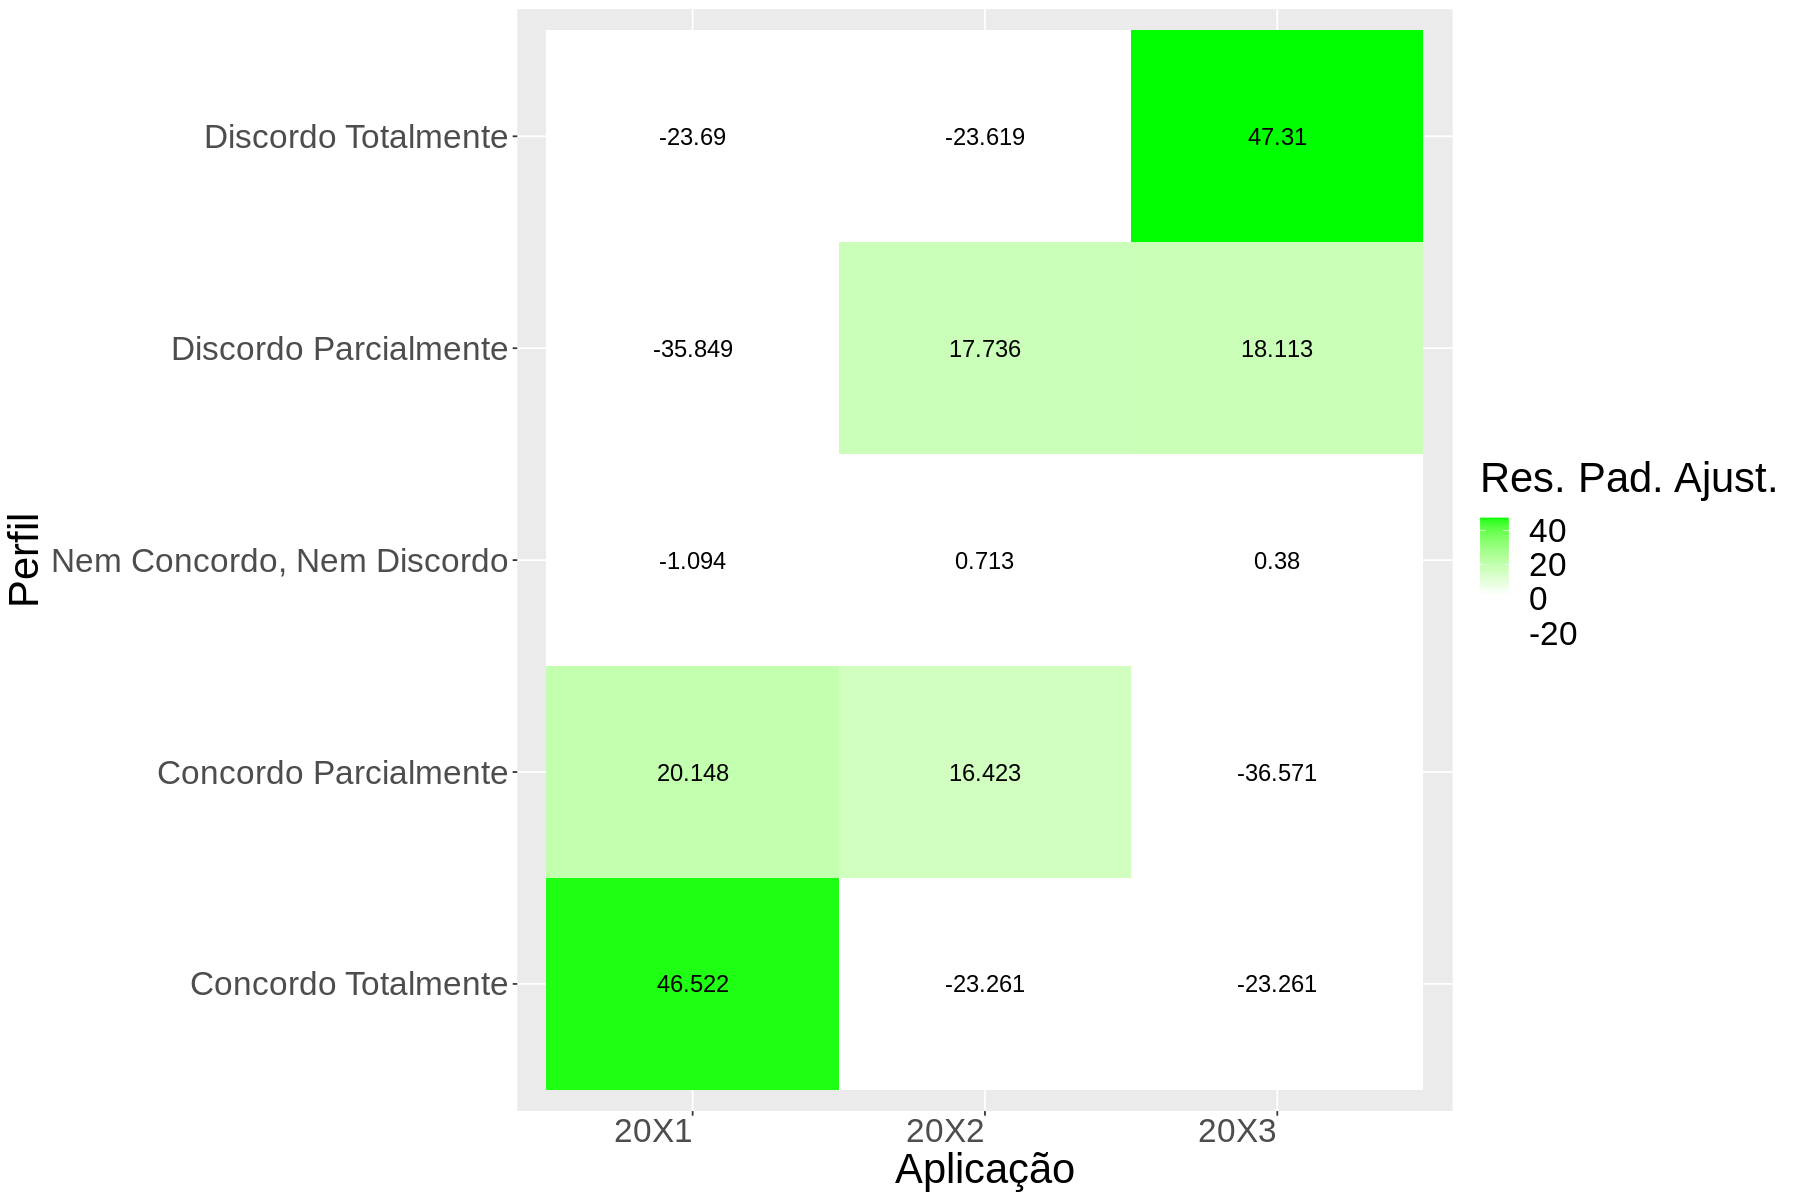

In [ ]:
options(repr.plot.width=15, repr.plot.height=10) #Configuração da largura e altura dos plots
data.frame(qui2$stdres) %>%
  rename(perfil = 1,
         aplicacao = 2) %>% 
  ggplot(aes(x = fct_rev(perfil), y = aplicacao,
             fill = Freq, label = round(Freq, 3))) +
  geom_tile() +
  geom_text(size = 5) +
  scale_fill_gradient2(low = "white", 
                       mid = "white", 
                       high = "green",
                       midpoint = 1.96) +
  labs(x = 'Perfil', y = 'Aplicação', fill = "Res. Pad. Ajust.") +
  coord_flip() +
          theme(text = element_text(size=25),
        axis.text.x = element_text(angle=0, hjust=1))


O resultado pode ser obtido por meio da função 'CA' do pacote 'FactoMineR'

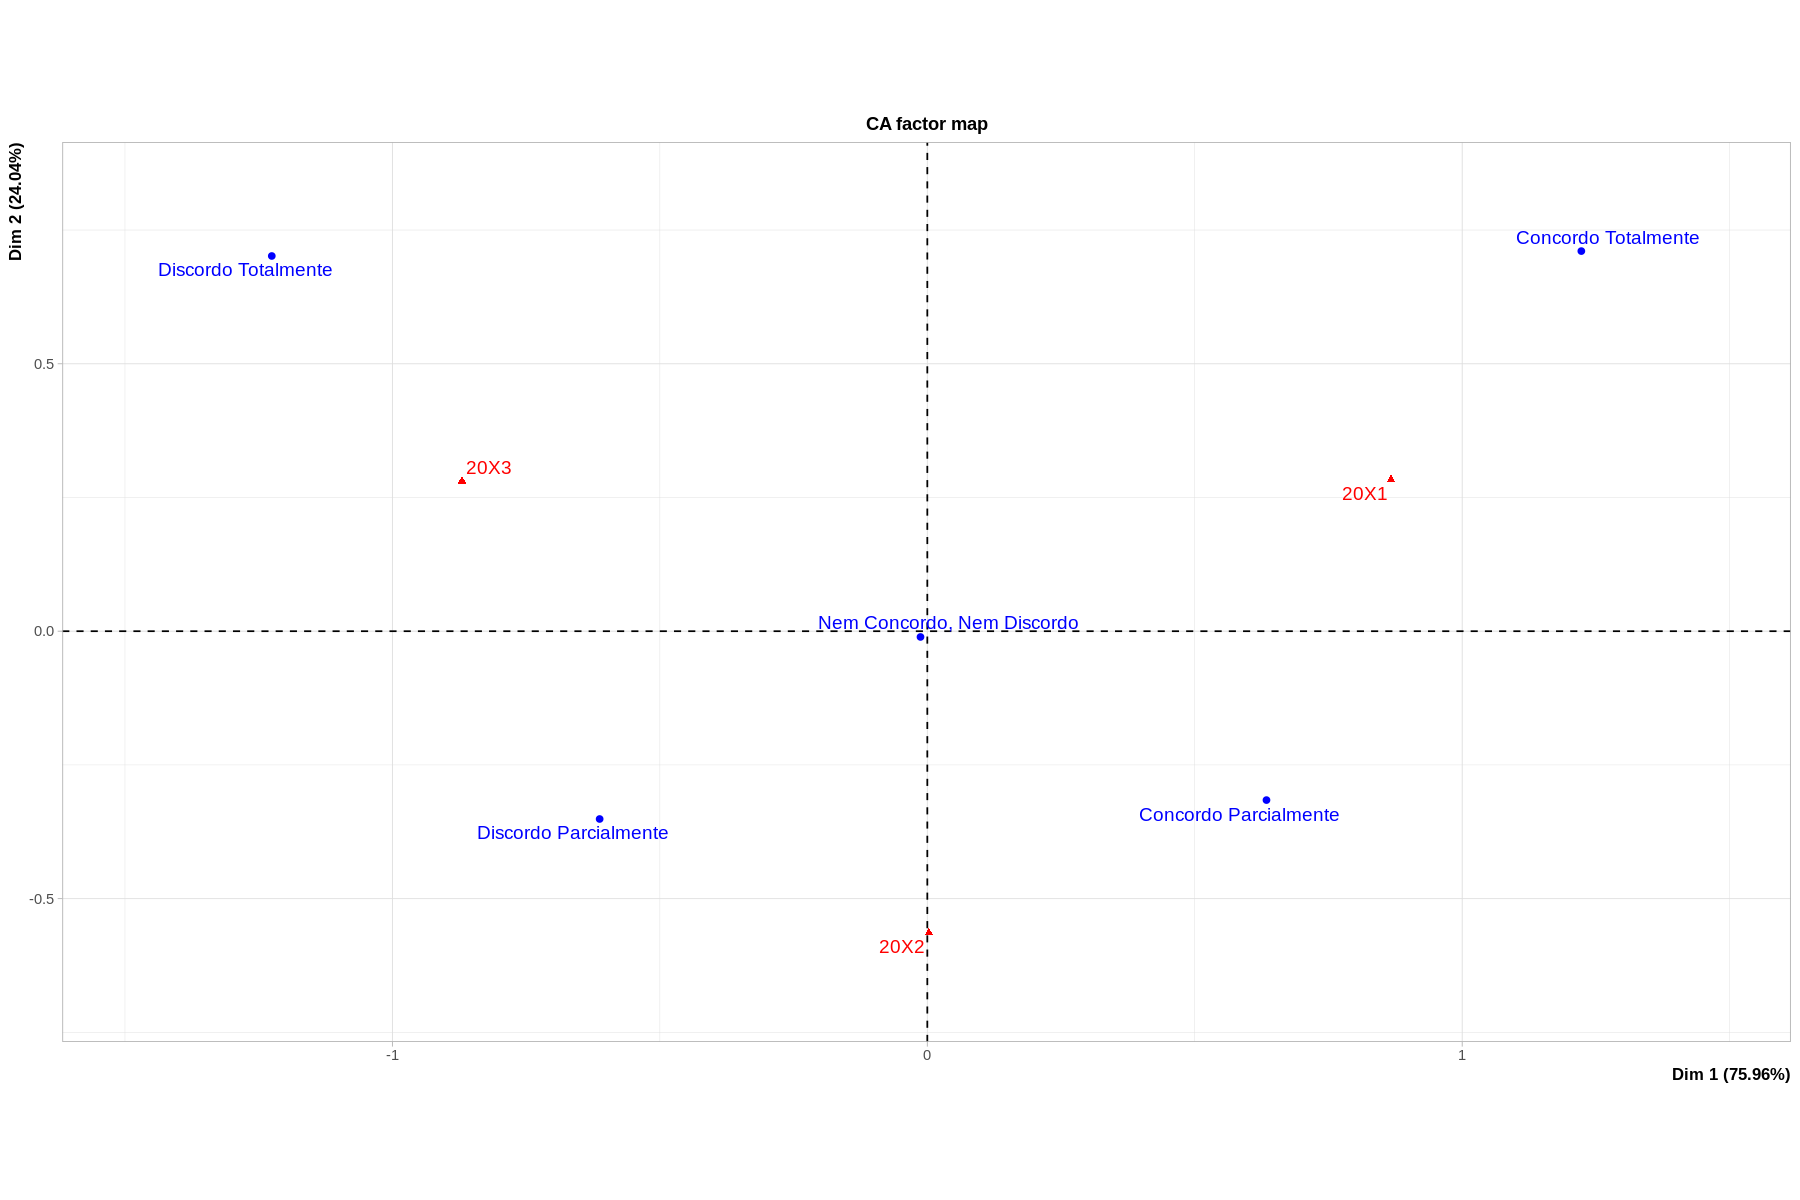

In [ ]:
anacor <- CA(tabela_contingencia, graph = TRUE)